In [ ]:
# default_exp curvature
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Porting Diffusion Curvature to Directed Graphs

First, let us address the obvious question: *what does curvature mean in a directed graph?* Dislodged from the comfortable basis of a Riemannian manifold, we are adrift from our classical intuitions. At most, directed graphs might be used to model flow on a manifold; but many directed graphs (like social networks) have no analog to a manifold, and hence no classical notions of curvature to rest upon.

All the same, there are indications of curvature in networks which we can stand upon to build intuition:
1. *Communities*: We should expect communities to exhibit positive curvature. Rays traced between friend groups should tend to converge, and resonate within the group (hence the phenomenon of the echo chamber).
2. Influence: People of high influence within a social network.

This notebook will document the effort to port Diffusion Curvature to directed graphs.

# Diffusion Curvature
The chief difference between diffusion curvature in the directed graphs setting And the regular seven is the adjacency matrix of a directed graph is a symmetric. However, nothing about diffusion curvature requires symmetry, hence we must simply be a little careful with the definition of the diffusion matrix, taking pains not to divide by zero during normalization. This is handled by the diffusion matrix function in `utils.py`. Thus, we need only provide a wrapper around the diffusion curvature function in the `diffusion_curvature` package.

In [ ]:
# export
from directed_graphs.differentiable_laziness import curvature
from directed_graphs.utils import diffusion_matrix_from_graph
import warnings
def diffusion_curvature(G = None, t = 8, A = None, self_loops=10,aperture=1):
  """Computes diffusion curvature of graph (or raw adjacency matrix), with tunable parameter t"""
  assert (G is not None) or (A is not None)
  if G is not None:
    P = diffusion_matrix_from_graph(G=G, self_loops=self_loops)
  if A is not None:
    P = diffusion_matrix_from_graph(A=A, self_loops=self_loops)
  ks = curvature(P,diffusion_powers = t,aperture=aperture)
  return ks

## Testing on karate club

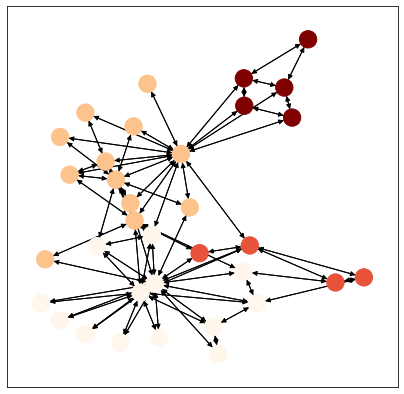

In [ ]:
from torch_geometric.datasets import KarateClub
dataset = KarateClub()
data = dataset[0]
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="OrRd")
    plt.show()
G = to_networkx(data, to_undirected=False)
visualize_graph(G, color=data.y)

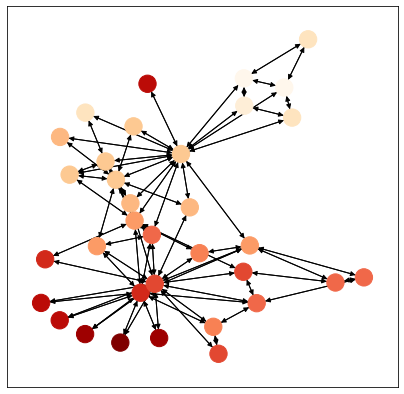

In [ ]:
ks = diffusion_curvature(data, t=30, self_loops=10,aperture=1)
visualize_graph(G,color=ks)

In [ ]:
ks.numpy()

array([0.7288915 , 0.7288915 , 0.7288916 , 0.7288915 , 0.7288914 ,
       0.72889125, 0.72889125, 0.7288915 , 0.72889173, 0.72889185,
       0.7288913 , 0.7288919 , 0.7288914 , 0.72889155, 0.728892  ,
       0.72889197, 0.7288914 , 0.7288915 , 0.72889197, 0.72889155,
       0.7288919 , 0.72889155, 0.7288919 , 0.72889173, 0.72889173,
       0.72889173, 0.7288918 , 0.7288918 , 0.7288917 , 0.7288917 ,
       0.7288916 , 0.7288916 , 0.72889185, 0.7288918 ], dtype=float32)

In [ ]:
P = diffusion_matrix_from_graph(G=data, self_loops=10)

In [ ]:
P.to_dense()

tensor([[0.3846, 0.0385, 0.0385,  ..., 0.0385, 0.0000, 0.0000],
        [0.0526, 0.5263, 0.0526,  ..., 0.0000, 0.0000, 0.0000],
        [0.0500, 0.0500, 0.5000,  ..., 0.0000, 0.0500, 0.0000],
        ...,
        [0.0625, 0.0000, 0.0000,  ..., 0.6250, 0.0625, 0.0625],
        [0.0000, 0.0000, 0.0455,  ..., 0.0455, 0.4545, 0.0455],
        [0.0000, 0.0000, 0.0000,  ..., 0.0370, 0.0370, 0.3704]])

In [ ]:
P.shape

torch.Size([34, 34])